In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import seaborn as sns

# The normal imports
from numpy.random import randn

# Import the stats librayr from numpy
from scipy import stats
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB #SciKitLearn GaussianNB Naive Bayes import
from sklearn import tree ##SciKitLearn GaussianNB Naive Bayes import


# Command so that plots appear in the iPython Notebook
%matplotlib inline

train = pd.read_csv('SumStudentClicksxResult-2-0-50.csv')   # better be in the correct directory!
test = pd.read_csv('SumStudentClicksxResult-2-50-100.csv')
test.head(5)

,id_student,SumOfsum_click,final_result
0,100893,250,Pass
1,101781,891,Pass
2,102806,486,Pass
3,102952,242,Pass
4,1035023,496,Pass


In [3]:
train.head(5)

,id_student,SumOfsum_click,final_result
0,100893,206,Pass
1,101781,1505,Pass
2,102806,590,Pass
3,102952,444,Pass
4,1035023,459,Pass


In [71]:
cols = ['SumOfsum_click']
cols2 = ['final_result']

trainArr = train[cols].to_numpy()
trainRes = train[cols2].to_numpy()

testArr = test[cols].to_numpy()
testRes = test[cols2].to_numpy()

#depreciated transformation to numpy array
# trainArr = train.to_numpy(cols)
# trainRes = train.to_numpy(cols2)

# testArr = test.to_numpy(cols)
# testRes = test.to_numpy(cols2)

#clf = GaussianNB()
clf = tree.DecisionTreeClassifier()

# print(trainArr[0])
# print(trainRes[0])
# print(testArr[0])
# print(testRes[0])

output = clf.fit(trainArr, trainRes).predict(testArr)

for i in range(390):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        print('CORRECT   ' + str(output[i]) + "   " + str(testRes[i]))
        #print("PREDICTION:  " + str(output[i]) + "  " + str(testArr[i]) + "  " + str(testRes[i]) + "     RIGHT")
    else:
        print('INCORRECT ' + str(output[i]) + "   " + str(testRes[i]))
        #print("PREDICTION:  " + str(output[i]) + "  " + str(testArr[i]) + "  " + str(testRes[i]) + "     WRONG")

INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Withdrawn   ['Withdrawn']
CORRECT   Pass   ['Pass']
INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Withdrawn   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Withdrawn   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Fail   ['Pass']
INCORRECT Distinction   ['Pass']
INCORRECT Pass   ['Withdrawn']
INCORRECT Fail   ['Pass']
INCORRECT Pass   ['Distinction']
INCORRECT Fail   ['Pass']
INCORRECT Fail   ['Withdrawn']
INCORRECT Fail   ['Pass']
INCORRECT Fail   ['Withdrawn']
INCORRECT Distinction   ['Pass']
CORRECT   Fail   ['Fail']
INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Pass   ['Withdrawn']
INCORRECT Pass   ['Fail']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INC

In [58]:
#clf = GaussianNB()
clf = tree.DecisionTreeClassifier()

#print(trainArr[0])
#print(trainRes[0])
#print(testArr[0])
#print(testRes[0])

output = clf.fit(trainArr, trainRes).predict(testArr)

for i in range(390):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        #print ""
        print("PREDICTION:    " + str(output[i]) + "  " + str(testArr[i]) + "       " + str(testRes[i]) + "     CORRECT")
    else:
        print("PREDICTION:    " + str(output[i]) + "  " + str(testArr[i]) + "       " + str(testRes[i]))


PREDICTION:    Fail  [250]       ['Pass']
PREDICTION:    Pass  [891]       ['Pass']     CORRECT
PREDICTION:    Pass  [486]       ['Pass']     CORRECT
PREDICTION:    Pass  [242]       ['Pass']     CORRECT
PREDICTION:    Pass  [496]       ['Pass']     CORRECT
PREDICTION:    Pass  [683]       ['Pass']     CORRECT
PREDICTION:    Withdrawn  [170]       ['Withdrawn']     CORRECT
PREDICTION:    Pass  [82]       ['Pass']     CORRECT
PREDICTION:    Fail  [214]       ['Pass']
PREDICTION:    Pass  [473]       ['Pass']     CORRECT
PREDICTION:    Pass  [821]       ['Pass']     CORRECT
PREDICTION:    Pass  [971]       ['Pass']     CORRECT
PREDICTION:    Pass  [201]       ['Pass']     CORRECT
PREDICTION:    Withdrawn  [168]       ['Pass']
PREDICTION:    Pass  [355]       ['Pass']     CORRECT
PREDICTION:    Withdrawn  [431]       ['Pass']
PREDICTION:    Pass  [295]       ['Pass']     CORRECT
PREDICTION:    Pass  [118]       ['Pass']     CORRECT
PREDICTION:    Fail  [630]       ['Pass']
PREDICTION:    

In [72]:
correct = 0.0

for i in range(len(output)): 
    if testRes[i][0] == output[i]: 
        correct += 1
    
print(correct / len(output))


#print("Accuracy: " + gnb.score(testArr, testRes))
print("Accuracy: " + str(clf.score(testArr, testRes)))

0.5370843989769821
Accuracy: 0.5370843989769821


In [73]:
expected = testRes
predicted = clf.predict(testArr)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

 Distinction       0.11      0.10      0.10        21
        Fail       0.21      0.32      0.25        50
        Pass       0.71      0.69      0.70       275
   Withdrawn       0.07      0.04      0.05        45

    accuracy                           0.54       391
   macro avg       0.27      0.29      0.28       391
weighted avg       0.54      0.54      0.54       391

[[  2   2  16   1]
 [  0  16  31   3]
 [ 15  48 190  22]
 [  1  11  31   2]]


In [74]:
count=0 
passn=0
fail=0
distinction=0
withdrawn=0
for i in range(len(output)): 
    count += 1
    if testRes[i][0]=='Pass':
        passn += 1
    if testRes[i][0]=='Fail':
        fail += 1
    if testRes[i][0]=='Distinction':
        distinction += 1
    if testRes[i][0]=='Withdrawn':
        withdrawn += 1
print ("Pass: " + str(passn))
print ("Fail: " + str(fail))
print ("Distinction: " + str(distinction))
print ("Withdrawn: " + str(withdrawn))
    

Pass: 275
Fail: 50
Distinction: 21
Withdrawn: 45


In [52]:
feature_names=('Pass','Fail', 'Distinction', 'Withdrawn')
with open("studentTree.dot", 'w') as f:
         f = tree.export_graphviz(clf, out_file=f, feature_names=feature_names)

ValueError: Length of feature_names, 4 does not match number of features, 1

(array([216., 109.,  35.,  12.,  10.,   4.,   1.,   0.,   1.,   3.]),
 array([1.0000e+00, 3.7630e+02, 7.5160e+02, 1.1269e+03, 1.5022e+03,
        1.8775e+03, 2.2528e+03, 2.6281e+03, 3.0034e+03, 3.3787e+03,
        3.7540e+03]),
 <a list of 10 Patch objects>)

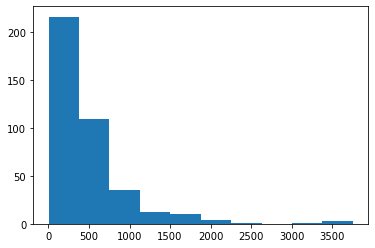

In [53]:
plt.hist(testArr)

AttributeError: 'Rectangle' object has no property 'normed'

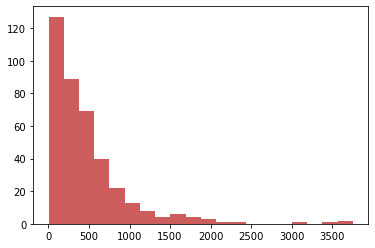

In [54]:
plt.hist(testArr, normed=True,color='indianred',alpha=0.5,bins=20)
#plt.hist(output, normed=True,alpha=0.5,bins=20)

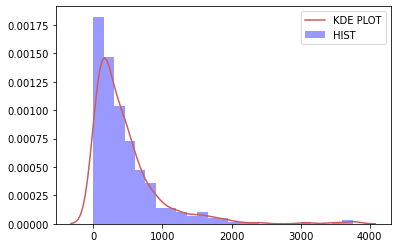

In [55]:
sns.distplot(testArr,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':"HIST"})

AttributeError: 'Rectangle' object has no property 'normed'

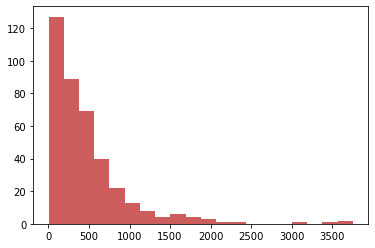

In [56]:
plt.hist(testArr, normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(trainArr, normed=True,alpha=0.5,bins=20)

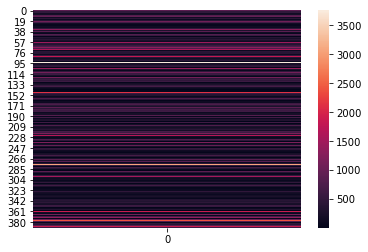

In [57]:
sns.heatmap(testArr)